In [ ]:
# rtmdet-tiny, coco, plantdoc, epoch 300, assemFormer注意力机制
!python tools/train.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem.py
!featurize instance release $UUID

06/28 22:40:29 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 614022171
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,co

In [1]:
# test
!python tools/test.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem.py \
work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem/best_coco_bbox_mAP_epoch_290.pth

06/29 09:41:14 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 1792624620
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
    PyTorch: 1.10.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,c

plot curve of work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem/20250628_224004/vis_data/20250628_224004.json, metric is loss
save curve to: work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem/rtmdet_tiny_assem_loss.jpg


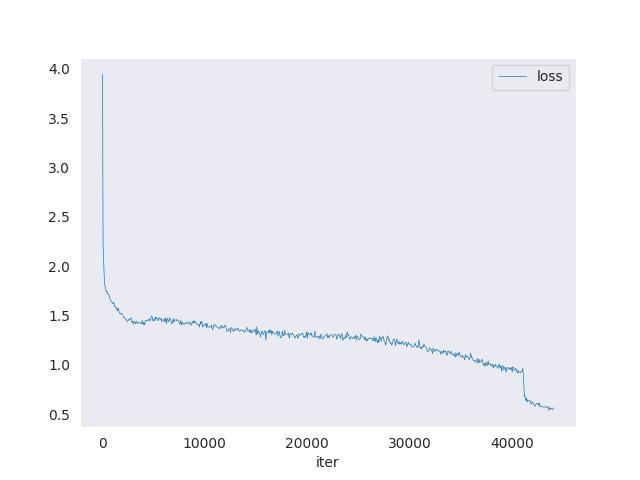

In [5]:
# figure, loss
!python tools/analysis_tools/analyze_logs.py plot_curve work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem/20250628_224004/vis_data/20250628_224004.json --keys loss --out work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem/rtmdet_tiny_assem_loss.jpg --legend loss
# -out mAP.pdf --legend mAP
from PIL import Image
img=Image.open('work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem/rtmdet_tiny_assem_loss.jpg')
img.show()

In [3]:
# 计算参数量和FLOPS
!python tools/analysis_tools/get_flops.py configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem.py

06/30 17:26:02 - mmengine - WARNING - Some config files, such as configs/yolact and configs/detectors,may have compatibility issues with torch.jit when torch<1.12. If you want to calculate flops for these models, please make sure your pytorch version is >=1.12.
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
06/30 17:26:19 - mmengine - WARNING - Unsupported operator aten::silu_ encountered 54 time(s)
06/30 17:26:19 - mmengine - WARNING - Unsupported operator aten::add encountered 18 time(s)
06/30 17:26:19 - mmengine - WARNING - Unsupported operator aten::hardsigmoid_ encountered 4 time(s)
06/30 17:26:19 - mmengine - WARNING - Unsupported operator aten::mul encountered 53 time(s)
06/30 17:26:19 - mmengine - WARNING - Unsupported operator aten::max_pool2d encountered 3 time(s)
06/30 17:26:19 - mmengine - WARNING - Unsupported operator aten::sigmoid encountered 31 time(s)
06/30 17:26:19 - mmengine - WARNING - Unsupported operator aten::im2col encountered

In [4]:
# 计算FPS
!python -m torch.distributed.launch --nproc_per_node=1 --master_port=29500  \
        tools/analysis_tools/benchmark.py \
        configs/rtmdet/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem.py \
        --checkpoint work_dirs/rtmdet_tiny_8xb32-300e_coco-plantdoc-assem/best_coco_bbox_mAP_epoch_290.pth \
        --launcher pytorch --max-iter 237 --log-interval 237 --repeat-num 10

/environment/miniconda3/lib/python3.7/site-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
/home/featurize/work/.local/lib/python3.7/site-packages/mmengine/utils/dl_utils/setup_env.py:27: UserWarning: Multi-processing start method `fork` is different from the previous setting `spawn`.It will be force set to `fork`. You can change this behavior by changing `mp_start_method` in your config.
  f'Multi-processing start method `{mp_start_method}` is '
/home/featurize/work/.local/lib/python3.7/site-packages/mmengine/utils/dl_utils/setup_env.py:47: UserWarning: Setting OMP_NUM_THREADS environment variable fo